In [22]:
import netCDF4 as nc
import numpy as np

import os
import glob


import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
# plot the interpolated data with cartopy coastlines
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import sys
sys.path.append(os.path.abspath(os.path.join('..')))
import common_methods as cm

XC = Lon, YC = Lat

ideally the output would be a grid of size (365, 450, 540) where (450, 540) is the size of the Lon/Lat/grid

just 2019 is good for now. and yep, nearest neighbor is probably fine

In [23]:
grid_f = os.path.expanduser('~/Data/mike/L2_Disko_Bay_grid.nc')
grid = xr.open_dataset(grid_f)
grid

<xarray.Dataset>
Dimensions:  (Y: 450, X: 540, Xp1: 541, Yp1: 451, Z: 53)
Dimensions without coordinates: Y, X, Xp1, Yp1, Z
Data variables: (12/16)
    XC       (Y, X) float32 ...
    YC       (Y, X) float32 ...
    XG       (Y, X) float32 ...
    YG       (Y, X) float32 ...
    AngleCS  (Y, X) float32 ...
    AngleSN  (Y, X) float32 ...
    ...       ...
    HFacC    (Z, Y, X) float32 ...
    HFacW    (Z, Y, Xp1) float32 ...
    HFacS    (Z, Yp1, X) float32 ...
    drF      (Z) float32 ...
    Depth    (Y, X) float32 ...
    rA       (Y, X) float32 ...

In [25]:
ds_a = xr.open_dataset('2019_disko_a.nc')
ds_b = xr.open_dataset('2019_disko_b.nc')

ds = xr.concat([ds_a, ds_b], dim='time')
ds = ds.isel(time=slice(0, -1))
# ds['time'] = cm.convert_int_time(ds['time'])

ds = ds.where(ds['chlor_a'] <= 100)
ds = ds.where(ds['chlor_a'] >= 0)
ds

<xarray.Dataset>
Dimensions:  (time: 365, lat: 401, lon: 1251)
Coordinates:
  * time     (time) float64 1.79e+04 1.79e+04 1.79e+04 ... 1.826e+04 1.826e+04
  * lat      (lat) float64 71.24 71.23 71.22 71.21 ... 67.11 67.1 67.09 67.08
  * lon      (lon) float64 -60.2 -60.19 -60.18 -60.17 ... -47.2 -47.19 -47.18
Data variables:
    chlor_a  (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

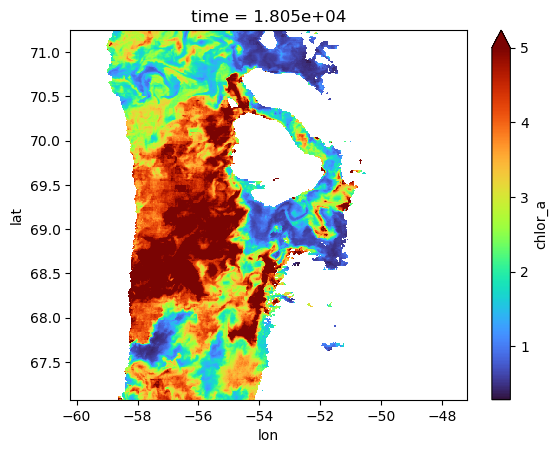

In [26]:
ds['chlor_a'].isel(time=150).plot(vmax = 5, cmap='turbo')
plt.show()

In [27]:
YC = grid['YC']
XC = grid['XC']

interped_ds = xr.Dataset(coords={'time': ds['time'], 'YC': YC, 'XC': XC})

interped_ds['chlor_a'] = ds['chlor_a'].interp(lat=YC, lon=XC)
interped_ds


<xarray.Dataset>
Dimensions:  (time: 365, Y: 450, X: 540)
Coordinates:
  * time     (time) float64 1.79e+04 1.79e+04 1.79e+04 ... 1.826e+04 1.826e+04
    YC       (Y, X) float32 ...
    XC       (Y, X) float32 ...
    lat      (Y, X) float32 68.28 68.28 68.28 68.29 ... 70.61 70.61 70.61 70.61
    lon      (Y, X) float32 -55.91 -55.9 -55.89 -55.88 ... -49.92 -49.91 -49.9
Dimensions without coordinates: Y, X
Data variables:
    chlor_a  (time, Y, X) float64 nan nan nan nan nan ... nan nan nan nan nan

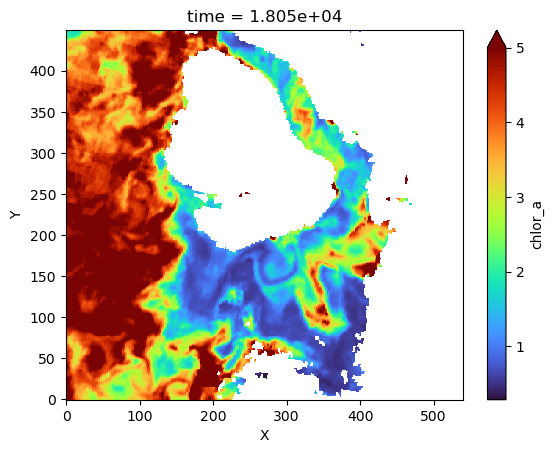

In [28]:
interped_ds['chlor_a'].isel(time=150).plot(vmax = 5, cmap='turbo')
plt.show()

In [29]:
# write interped_ds to file
interped_ds.to_netcdf('2019_disko_interped.nc')